## Observations and Insights 

In [248]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [249]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [250]:
combined_df["Mouse ID"].nunique()

249

In [251]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [252]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

duplicate_mouse_id[0]

'g989'

In [253]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [254]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
clean_duplicate_mouse_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [255]:
# Checking the number of mice in the clean DataFrame.
clean_duplicate_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [256]:
clean_duplicate_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [257]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_duplicate_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_duplicate_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_duplicate_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stds = clean_duplicate_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_duplicate_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats_tbl_df = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stds,
                              "Tumor Volume Std. Err.":sems})
summary_stats_tbl_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [258]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_tbl_agg_df = clean_duplicate_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_stats_tbl_agg_df

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

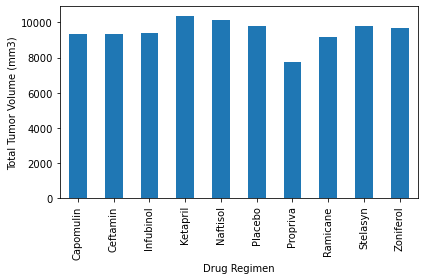

In [259]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#create total vol groupby drug regimen
total_vol = clean_duplicate_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()

sum_chart = total_vol.plot(kind='bar')
sum_chart.set_ylabel("Total Tumor Volume (mm3)")

plt.tight_layout()
plt.savefig("pandabartotalvol.png")
plt.show()


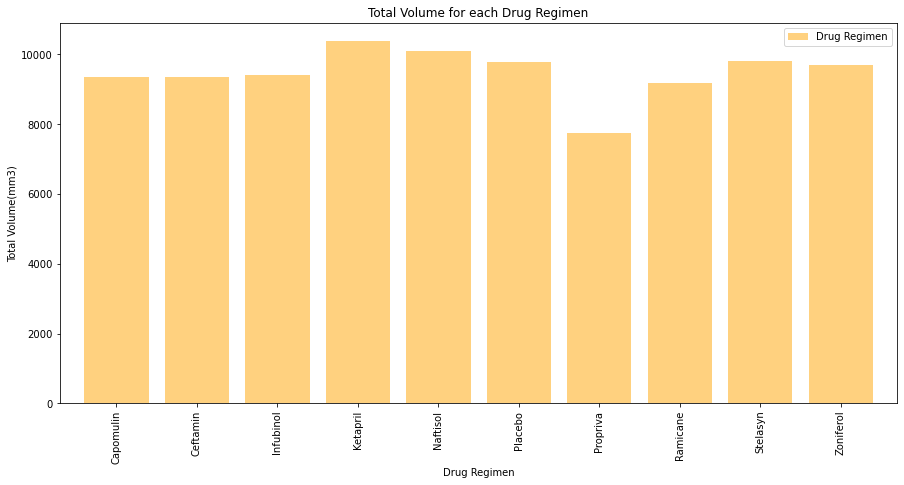

In [260]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#total_vol
x_axis = np.arange(len(total_vol))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,7))
plt.bar(x_axis,total_vol,color='orange',alpha=0.5, align="center")
plt.xticks(tick_locations,list(total_vol.index), rotation='vertical')
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(total_vol)*1.05)

plt.title("Total Volume for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Volume(mm3)")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.savefig("pybartotalvol.png")

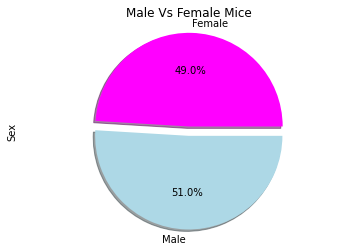

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice = clean_duplicate_mouse_df.groupby('Sex')
gender_group_count = pd.DataFrame(gender_mice['Sex'].count())

explode = (0.1,0)
gender_group_count.plot(kind='pie',y='Sex', title="Male Vs Female Mice",explode=explode,autopct='%1.1f%%', shadow=True,colors=["magenta","lightblue"],legend=False)
plt.axis("equal")
plt.savefig("pandapiechart.png")
plt.show()
# gender_bar

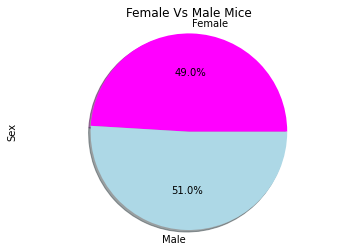

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)
counts = gender_group_count['Sex']

# Creates the pie chart
colors=["magenta","lightblue"]
plt.pie(counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.title("Female Vs Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [269]:
clean_duplicate_mouse_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [283]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
cap_df = clean_duplicate_mouse_df.loc[clean_duplicate_mouse_df["Drug Regimen"] == "Capomulin",:]
#cap_max = cap_max[['Timepoint']].idxmax()
ram_df = clean_duplicate_mouse_df.loc[clean_duplicate_mouse_df["Drug Regimen"] == "Ramicane",:]
#ram_max = ram_max[['Timepoint']].idxmax()
inf_df = clean_duplicate_mouse_df.loc[clean_duplicate_mouse_df["Drug Regimen"] == "Infubinol",:]
#inf_max = inf_max[['Timepoint']].idxmax()
ceft_df = clean_duplicate_mouse_df.loc[clean_duplicate_mouse_df["Drug Regimen"] == "Ceftamin",:]
#ceft_max = ceft_max[['Timepoint']].idxmax()

#groupby mouse id for timepoints
cap_max = cap_df.groupby('Mouse ID')['Timepoint'].max()
cap_vol = pd.DataFrame(cap_max)

ram_max = ram_df.groupby('Mouse ID')['Timepoint'].max()
ram_vol = pd.DataFrame(ram_max)

inf_max = inf_df.groupby('Mouse ID')['Timepoint'].max()
inf_vol = pd.DataFrame(inf_max)

ceft_max = ceft_df.groupby('Mouse ID')['Timepoint'].max()
ceft_vol = pd.DataFrame(ceft_max)

#merge DF's

cap_merge = pd.merge(cap_vol, clean_duplicate_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
cap_merge.head()

ram_merge = pd.merge(ram_vol, clean_duplicate_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ram_merge.head()

inf_merge = pd.merge(inf_vol, clean_duplicate_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
inf_merge.head()

ceft_merge = pd.merge(ceft_vol, clean_duplicate_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ceft_merge.head()

#assign to be calculated
tum_vol_cap = cap_merge["Tumor Volume (mm3)"]
tum_vol_ram = ram_merge["Tumor Volume (mm3)"]
tum_vol_inf = inf_merge["Tumor Volume (mm3)"]
tum_vol_ceft = ceft_merge["Tumor Volume (mm3)"]
# assign volumes to list
tumor_vol_data = [tum_vol_cap,tum_vol_ceft,tum_vol_inf,tum_vol_ram]

In [290]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# for drugs in tumor_vol_data:
  #  ["Capomulin","Ramicane","Infubinol","Ceftamin"]
quartiles = tum_vol_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Capomulin Totals")
print(f"The lower quartile volume is: {lowerq}")
print(f"The upper quartile volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------------------")

quartiles = tum_vol_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ramicane Totals")
print(f"The lower quartile volume is: {lowerq}")
print(f"The upper quartile volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------------------")

quartiles = tum_vol_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Infubinol Totals")
print(f"The lower quartile volume is: {lowerq}")
print(f"The upper quartile volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------------------")

quartiles = tum_vol_ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ceftamin Totals")
print(f"The lower quartile volume is: {lowerq}")
print(f"The upper quartile volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-------------------------------------------------------------------")
#outlier_volume = clean_duplicate_mouse_df.loc[(clean_duplicate_mouse_df['Tumor Volume (mm3)'] < lower_bound) | (clean_duplicate_mouse_df['Tumor Volume (mm3)'] > upper_bound)]
#outlier_volume


Capomulin Totals
The lower quartile volume is: 32.37735684
The upper quartile volume is: 40.1592203
The interquartile range of volume is: 7.781863460000004
The the median of volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------------------------
Ramicane Totals
The lower quartile volume is: 31.56046955
The upper quartile volume is: 40.65900627
The interquartile range of volume is: 9.098536719999998
The the median of volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------------------------
Infubinol Totals
The lower quartile volume is: 54.04860769
The upper quartile volume is: 65.52574285
The interquartile range of volume is: 11.477135160000003
The the median of volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.741445

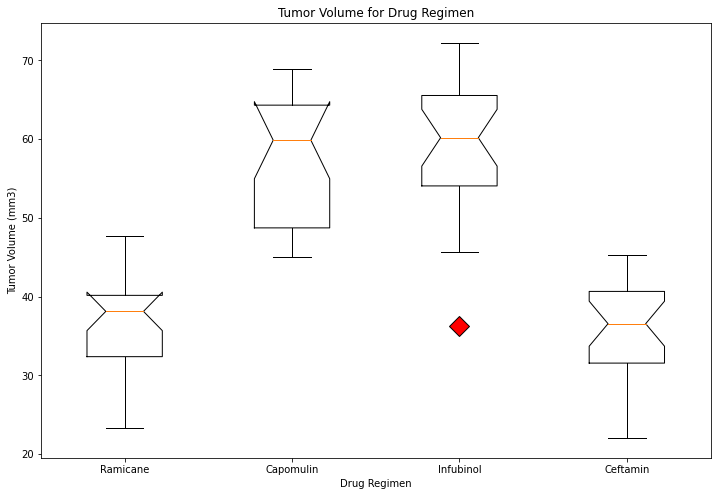

In [307]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#list from above
tumor_vol_data = [tum_vol_cap,tum_vol_ceft,tum_vol_inf,tum_vol_ram]

fig1, ax = plt.subplots(figsize=(12,8))
ax.set_title('Tumor Volume for Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

red_diamond = dict(markerfacecolor='r', marker='D',markersize=14)
ax.boxplot(tumor_vol_data, labels=["Ramicane","Capomulin","Infubinol","Ceftamin",],notch=True,flierprops=red_diamond)


# Save the figure
#plt.savefig("figures/BoxWhiskerPlot.png")

plt.show()

## Line and Scatter Plots

In [308]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = clean_duplicate_mouse_df.loc[clean_duplicate_mouse_df["Drug Regimen"] == "Capomulin"]
capo_df = capo_df.reset_index()
capo_df.head()



index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     10     s185    Capomulin  Female           3          17          0   
1     11     s185    Capomulin  Female           3          17          5   
2     12     s185    Capomulin  Female           3          17         10   
3     13     s185    Capomulin  Female           3          17         15   
4     14     s185    Capomulin  Female           3          17         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           43.878496                 0  
2           37.614948                 0  
3           38.177232                 0  
4           36.866876                 0

Text(0, 0.5, 'Volume (mm3)')

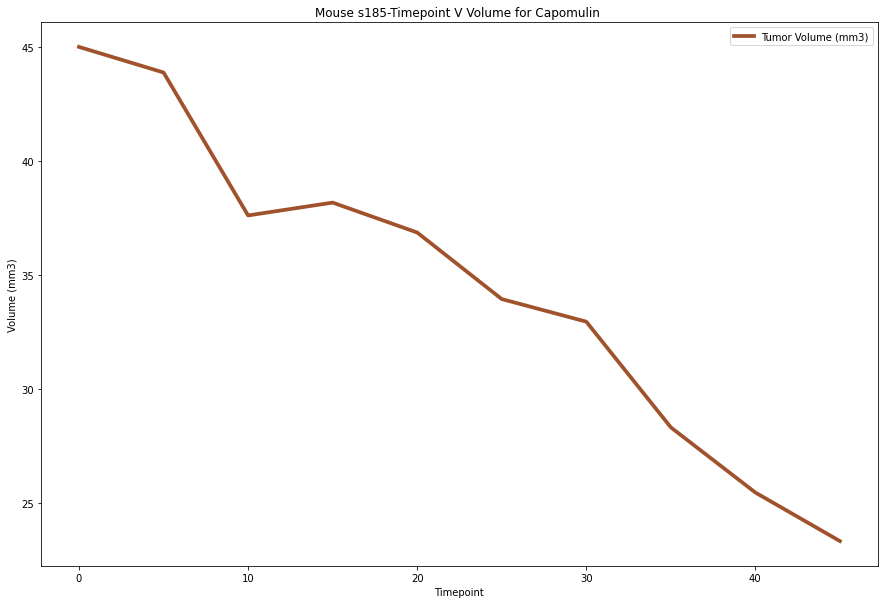

In [319]:
#mouse s185
s185_df = capo_df.loc[capo_df["Mouse ID"] == "s185"]
#s185_df.head()

s185_df = s185_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
s185_df.set_index('Timepoint').plot(figsize=(15,10), linewidth=3.75, color='sienna')
plt.title("Mouse s185-Timepoint V Volume for Capomulin ")
plt.ylabel("Volume (mm3)")

In [320]:
capo_df.head()

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     10     s185    Capomulin  Female           3          17          0   
1     11     s185    Capomulin  Female           3          17          5   
2     12     s185    Capomulin  Female           3          17         10   
3     13     s185    Capomulin  Female           3          17         15   
4     14     s185    Capomulin  Female           3          17         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           43.878496                 0  
2           37.614948                 0  
3           38.177232                 0  
4           36.866876                 0

In [327]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_weight_df = capo_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
#capo_weight_df.head()
capo_rename_df= capo_weight_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
#had to add reset index and change mouse id to index
capo_mean = pd.DataFrame(capo_rename_df.groupby(["Mouse ID", "Weight (g)"])["Average Tumor Volume"].mean()).reset_index()
capo_mean = capo_mean.set_index('Mouse ID')

capo_mean.head()


Weight (g)  Average Tumor Volume
Mouse ID                                  
b128              22             41.963636
b742              21             40.083699
f966              17             36.505973
g288              19             41.990097
g316              22             44.613344

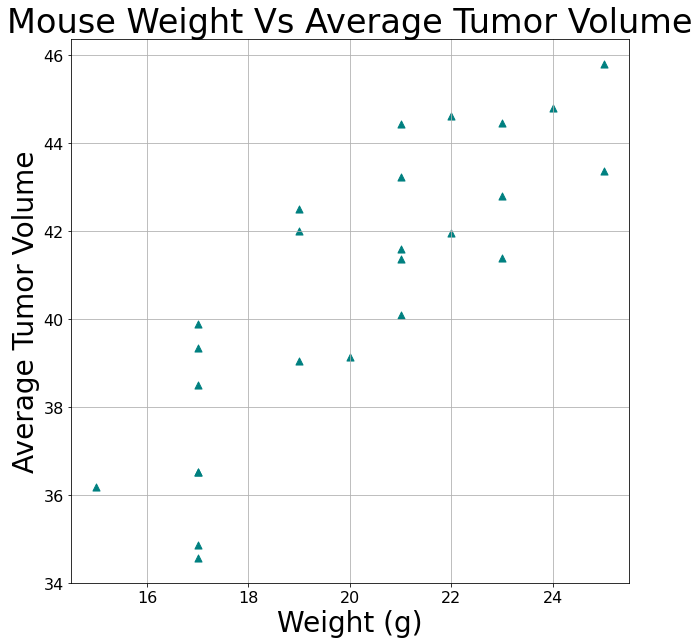

In [350]:

capo_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume",figsize=(10,10),grid=True,
                    title="Mouse Weight Vs Average Tumor Volume",color='teal',marker='^',s=50,fontsize=16)
plt.rcParams.update({'font.size': 28})
plt.show()

## Correlation and Regression

In [351]:
capo_mean.head()

Weight (g)  Average Tumor Volume
Mouse ID                                  
b128              22             41.963636
b742              21             40.083699
f966              17             36.505973
g288              19             41.990097
g316              22             44.613344

In [378]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculatepearsons correlation - use mean from above
mouse_weight = capo_mean.iloc[:,0]
average_volume = capo_mean.iloc[:,1]
#mouse_weight
#average_tumor

#call[0]
correlation = st.pearsonr(mouse_weight,average_volume)
print(round(correlation[0],2))

0.84


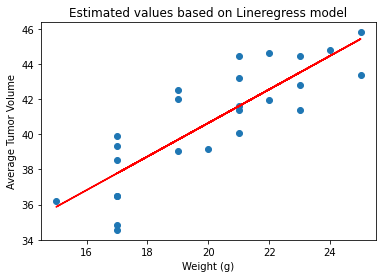

In [385]:
#assign weight and avg volume
weight_values = capo_mean['Weight (g)']
avg_values = capo_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_values, avg_values)

 # y=mx+b slope calculation
s_fit = weight_values * slope + intercept

plt.scatter(weight_values,avg_values)
plt.plot(weight_values,s_fit,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Estimated values based on Lineregress model")
plt.rcParams.update({'font.size': 10})
plt.show()